In [1]:
%matplotlib inline
from ANN_simulation import *

In [6]:
# fix dataset, compare different autoencoders

# root_dir = '../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'
# root_dir = '../previous_runs/snapshot_2015_11_04_21_02_56(automatically_9_iterations)/'
root_dir = '../previous_runs/snapshot_2015_11_29_19_36_54(another_series_of_11_iterations)/'

for i in range(15, 20):
    
    a=pickle.load(open(root_dir + 'resources/network_%d.pkl' % i,'rb'))
    print("FVE = %f" % a.get_fraction_of_variance_explained())
    
    b=plotting(a)

    my_file_list = coordinates_data_files([root_dir + 'target/'])._list_of_coor_data_files
    my_file_list = filter(lambda x: x.find('network_27') == -1, my_file_list)
    cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)

    color = [item[2] for item in a.get_many_dihedrals_from_coordinates_in_file(my_file_list)]

    temp_fig = b.plotting_with_coloring_option(plotting_space = "PC",
                                        cossin_data_for_plotting=cossin_data, 
                                        color_option='other', 
                                        other_coloring = color,
                                        )

    
plt.show()

IOError: [Errno 2] No such file or directory: '../previous_runs/snapshot_2015_11_29_19_36_54(another_series_of_11_iterations)/resources/network_15.pkl'

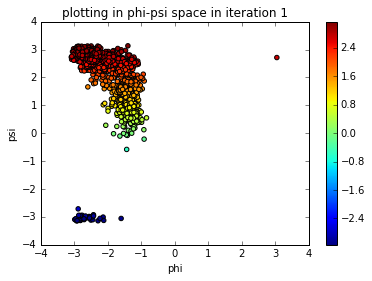

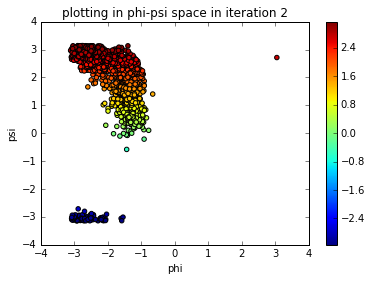

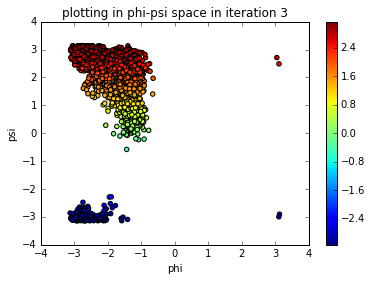

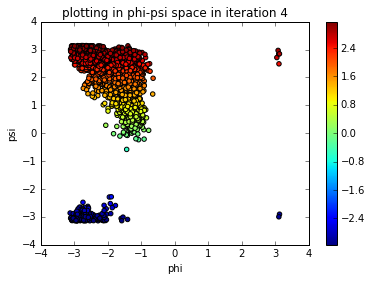

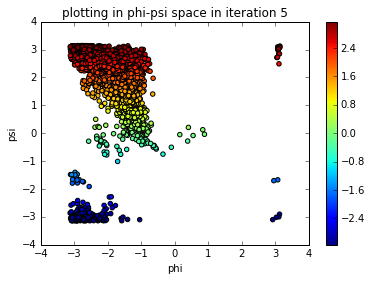

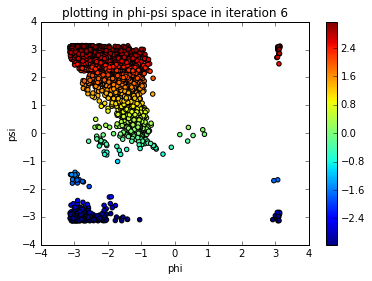

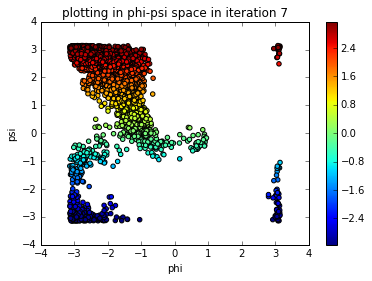

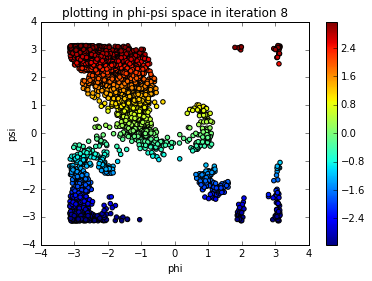

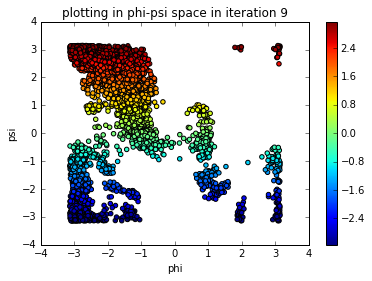

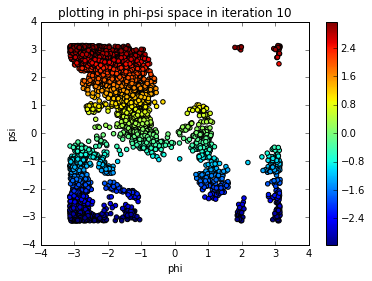

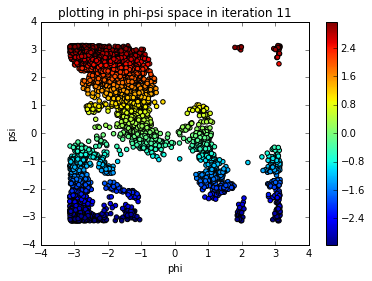

In [2]:
# fix autoencoder, compare different datasets
%matplotlib inline

root_dir = '../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'

folder_list = [root_dir + 'target/network_%d/' % item for item in range(1, 12)]
a=pickle.load(open(root_dir + 'resources/network_1.pkl','rb'))
my_file_list = [root_dir + 'target/unbiased/unbiased_output_coordinates.txt']

i = 1

for item in folder_list:
    
    b=plotting(a)
    my_file_list += coordinates_data_files_list([item])._list_of_coor_data_files
    cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)
    color = [item[2] for item in sutils.get_many_dihedrals_from_coordinates_in_file(my_file_list)]
    temp_fig = b.plotting_with_coloring_option(plotting_space = "phipsi",
                                        cossin_data_for_plotting = cossin_data,
                                        color_option='other', 
                                        other_coloring = color,
                                        axis_ranges=[[-4,4],[-4,4]],
                                        title="plotting in phi-psi space in iteration %d" % i
                                        )
#     temp_fig.savefig('iteration_%d.png' % i)
    
    i += 1
plt.show()

In [1]:
from ANN_simulation import *

a = pickle.load(open('../resources/network_1447.pkl','rb'))
a = simulation_management(a)
a.get_todo_list_of_commands_for_simulations(list_of_potential_center=[
        [1,2], [3,4], [5,6]])


['python ../src/biased_simulation.py 200 1000 500 1 2 network_1447 energy_expression_1447.txt',
 'python ../src/biased_simulation.py 200 1000 500 3 4 network_1447 energy_expression_1447.txt',
 'python ../src/biased_simulation.py 200 1000 500 5 6 network_1447 energy_expression_1447.txt']

[None, None, None, None, None]

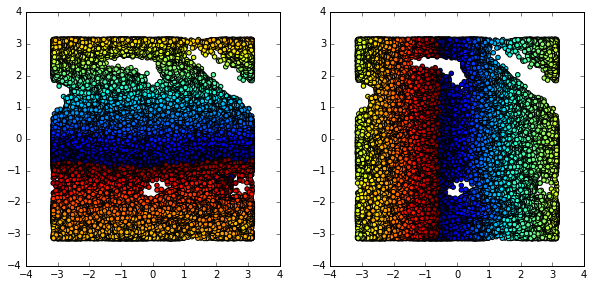

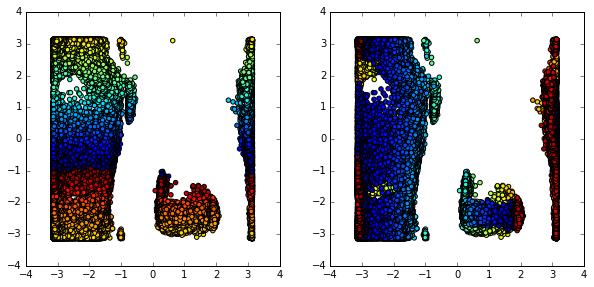

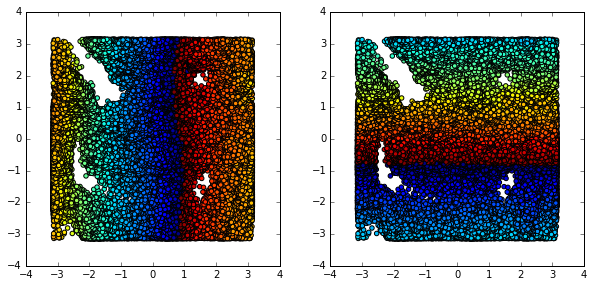

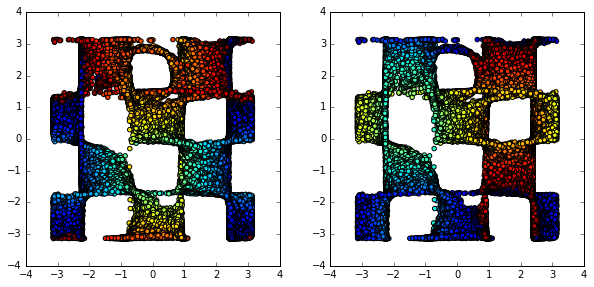

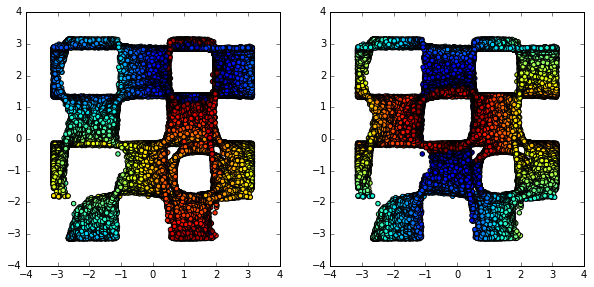

In [10]:
# try training on the complete dialanine dataset

def train_on_complete_dataset_using_circular(index):
    
#     complete_raw_data = np.loadtxt('complete_data.txt')
#     complete_angle_data = complete_raw_data / 180 * np.pi

#     complete_data = np.concatenate((np.cos(complete_angle_data).T, np.sin(complete_angle_data).T)).T

#     a = neural_network_for_simulation(index=1, 
#                                       training_data_interval = 5,
#                                       data_set_for_training= complete_data,
#                                       node_num = [8, 12, 4, 12, 8],   # circular
#                                       hidden_layers_types=[TanhLayer, CircularLayer, TanhLayer],
#                                       max_num_of_training=30
#                                      )
#     a.train()
#     a.save_into_file('complete_dataset_with_circular_node_index_%d.pkl' % index)

    a = pickle.load(open('complete_dataset_with_circular_node_index_%d.pkl' % index,'rb'))

    mid_res = a.get_mid_result()

    mid_result_1 = [item[1] for item in mid_res]
    mid_result_3 = [item[3] for item in mid_res]

    ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
    ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

    phi = [item[1] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]
    psi = [item[2] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]

    fig = plt.figure()
    fig.set_size_inches(10, 20)
    ax1 = fig.add_subplot(121, aspect='equal')
    ax1.scatter(ml_angles_1, ml_angles_2, c=phi)

    ax2 = fig.add_subplot(122, aspect='equal')
    ax2.scatter(ml_angles_1, ml_angles_2, c=psi)
    
    fig.savefig('complete_dataset_with_circular_%d.png' % index)

map(train_on_complete_dataset_using_circular, range(5))

KeyboardInterrupt: 

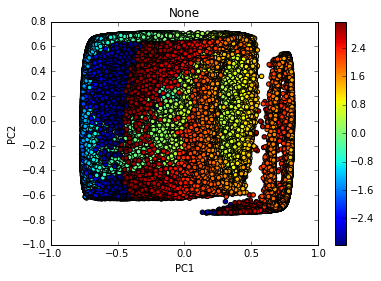

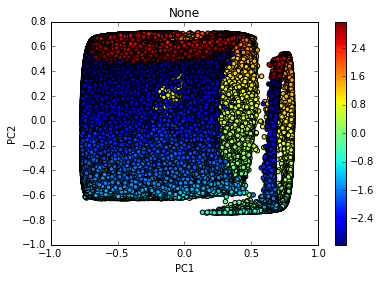

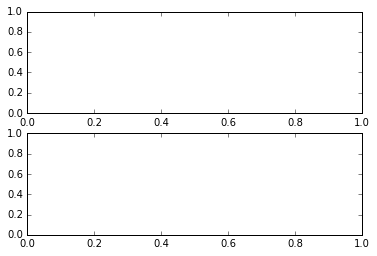

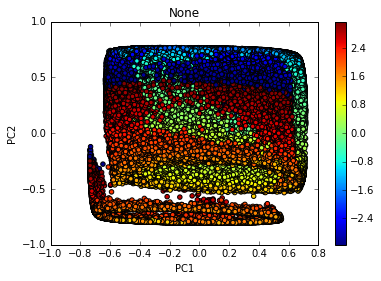

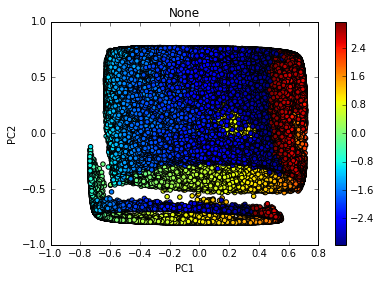

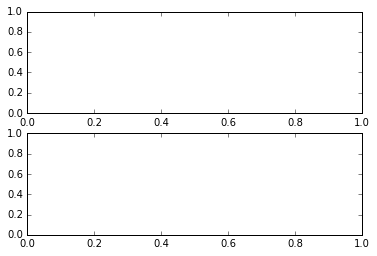

In [13]:
# try training on the complete dialanine dataset

def train_on_complete_dataset_using_tanh(index):

#     complete_raw_data = np.loadtxt('complete_data.txt')
#     complete_angle_data = complete_raw_data / 180 * np.pi

#     complete_data = np.concatenate((np.cos(complete_angle_data).T, np.sin(complete_angle_data).T)).T

#     a = neural_network_for_simulation(index=1, 
#                                       training_data_interval = 5,
#                                       data_set_for_training= complete_data,
#                                       node_num = [8, 12, 2, 12, 8],   
#                                       hidden_layers_types=[TanhLayer, TanhLayer, TanhLayer],
#                                       max_num_of_training=30
#                                      )
#     a.train()
#     a.save_into_file('complete_dataset_%d.pkl' % index)

    a = pickle.load(open('complete_dataset_%d.pkl' % index,'rb'))
    b = plotting(a)
    
    temp_fig, temp_ax_0, _ = b.plotting_with_coloring_option(plotting_space = "PC",
                                    color_option = 'phi'
                                   )

    temp_fig, temp_ax_1, _ = b.plotting_with_coloring_option(plotting_space = "PC",
                                    color_option = 'psi'
                                   )
    
    
    
    return

map(train_on_complete_dataset_using_tanh, range(5))

In [ ]:
from multiprocessing import Pool

num = 8

if __name__ == '__main__':
    p = Pool(num)
    p.map(train_on_complete_dataset_using_tanh, range(num))

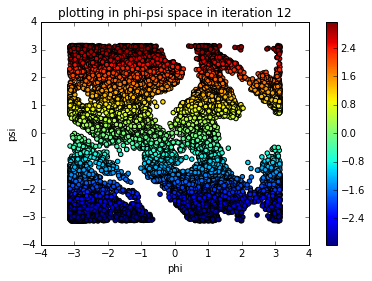

In [3]:
root_dir = '../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'

a=pickle.load(open(root_dir + 'resources/network_1.pkl','rb'))
my_file_list = coordinates_data_files_list([root_dir])._list_of_coor_data_files

    
b=plotting(a)
cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)
color = [item[2] for item in sutils.get_many_dihedrals_from_coordinates_in_file(my_file_list)]
temp_fig = b.plotting_with_coloring_option(plotting_space = "phipsi",
                                        cossin_data_for_plotting = cossin_data,
                                        color_option='other', 
                                        other_coloring = color,
                                        axis_ranges=[[-4,4],[-4,4]],
                                        title="plotting in phi-psi space in iteration %d" % i
                                        )
#     temp_fig.savefig('iteration_%d.png' % i)

start training network with index = 1, training maxEpochs = 30

Done training network with index = 1, training maxEpochs = 30



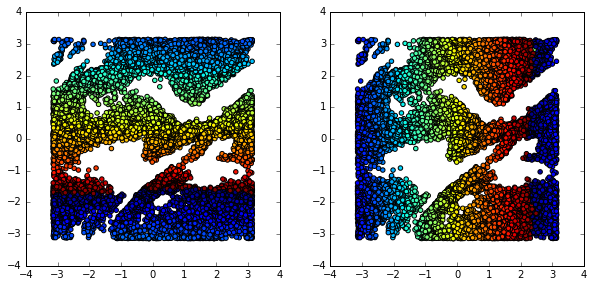

In [7]:
# train on previous data with circular network

def train_on_previous_data_using_circular(index):
    a = neural_network_for_simulation(index=1, 
                                      training_data_interval = 5,
                                      data_set_for_training= cossin_data,
                                      node_num = [8, 12, 4, 12, 8],   # circular
                                      hidden_layers_types=[TanhLayer, CircularLayer, TanhLayer],
                                      max_num_of_training=30
                                     )
    a.train()
    a.save_into_file('previous_data_with_circular_node_index_%d.pkl' % index)

    a = pickle.load(open('previous_data_with_circular_node_index_%d.pkl' % index,'rb'))

    mid_res = a.get_mid_result()

    mid_result_1 = [item[1] for item in mid_res]
    mid_result_3 = [item[3] for item in mid_res]

    ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
    ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

    phi = [item[1] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]
    psi = [item[2] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]

    fig = plt.figure()
    fig.set_size_inches(10, 20)
    ax1 = fig.add_subplot(121, aspect='equal')
    ax1.scatter(ml_angles_1, ml_angles_2, c=phi)

    ax2 = fig.add_subplot(122, aspect='equal')
    ax2.scatter(ml_angles_1, ml_angles_2, c=psi)
    
    fig.savefig('previous_data_with_circular_%d.png' % index)
    
train_on_previous_data_using_circular(1)

In [1]:
from ANN_simulation import *

a=pickle.load(open('./complete_dataset_with_circular_node_index_0.pkl','rb'))

/home/fisiksnju/.anaconda2/lib/python2.7/site-packages/numpy/lib/npyio.py:891: UserWarning: loadtxt: Empty input file: "../target/temp_network/biased_output_fc_1000_x1_0_x2_3_coordinates.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


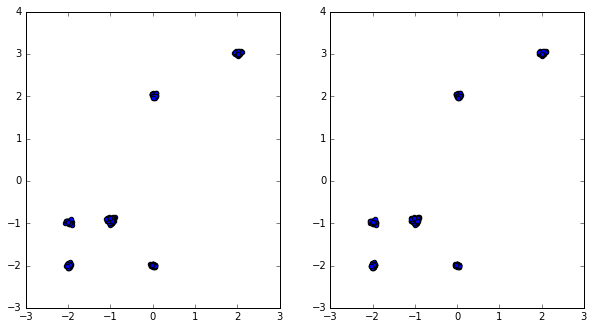

In [3]:
my_file_list = coordinates_data_files_list(['../target/temp_network/'])._list_of_coor_data_files

    
cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)

a = pickle.load(open('complete_dataset_with_circular_node_index_0.pkl','rb'))

mid_res = a.get_mid_result(cossin_data)

mid_result_1 = [item[1] for item in mid_res]
mid_result_3 = [item[3] for item in mid_res]

ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

# phi = [item[1] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]
# psi = [item[2] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]

fig = plt.figure()
fig.set_size_inches(10, 20)
ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(ml_angles_1, ml_angles_2)

ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(ml_angles_1, ml_angles_2)
